In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from si_prefix import si_format

# Overview #

## TODO##

 1. **[DONE]** Implement host Python class API to wrap DMA ADC scanning
    mechanism described in [this notebook][1].
 2. Implement device C++ class API to wrap DMA ADC scanning mechanism
    described in [this notebook][1].

[1]: Example%20-%20Periodic%20multi-channel%20ADC%20multiple%20samples%20using%20DMA.ipynb

# Device

### Connect to device

In [2]:
import numpy as np
import pandas as pd

import arduino_helpers.hardware.teensy as teensy
from teensy_minimal_rpc.adc_sampler import AdcSampler, analog_reads
from teensy_minimal_rpc import SerialProxy
import teensy_minimal_rpc.ADC as ADC


# Disconnect from existing proxy (if available)
try:
    del proxy
except NameError:
    pass

proxy = SerialProxy()
proxy.pin_mode(teensy.LED_BUILTIN, 1)
proxy.digital_write(teensy.LED_BUILTIN, 1)
proxy.free_all()

--------------------------------------------------

## Example: Measure `'A0'` when connected to 3.3V

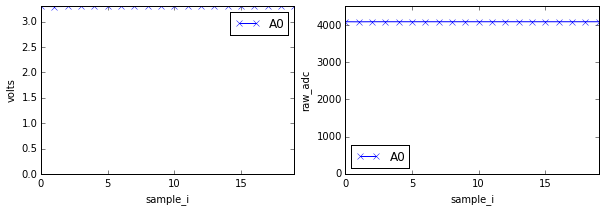

In [3]:
(sampling_rate_hz, adc_settings,
 df_volts_i, df_adc_results) = analog_reads(proxy, 'A0', 20, resolution=12)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

df_volts_i.plot(ylim=0, ax=axes[0], style='x-')
axes[0].set_ylabel('volts')

df_adc_results.plot(style='x-', ax=axes[1],
                    ylim=(-5, 1.1 * (1 << adc_settings['Bit-width'])))
axes[1].set_ylabel('raw_adc')
for ax in axes:
    ax.set_xlabel('sample_i')

--------------------------------------------------

## Example: Measure `'A0'` when connected to GND

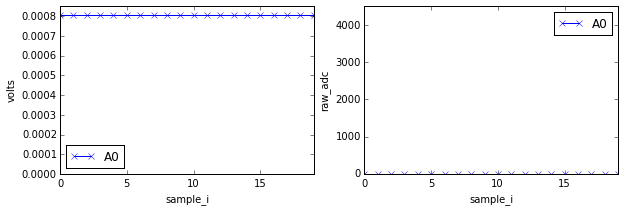

In [4]:
(sampling_rate_hz, adc_settings,
 df_volts_i, df_adc_results) = analog_reads(proxy, 'A0', 20, resolution=12)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

df_volts_i.plot(ylim=0, ax=axes[0], style='x-')
axes[0].set_ylabel('volts')

df_adc_results.plot(style='x-', ax=axes[1],
                    ylim=(-5, 1.1 * (1 << adc_settings['Bit-width'])))
axes[1].set_ylabel('raw_adc')
for ax in axes:
    ax.set_xlabel('sample_i')